In [3]:
# Import
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Code für die visuelle Darstellung
Eingabe der Daten folgt im nächsten Abschnitt

In [4]:
# Modell und Pipeline laden
pipeline = joblib.load('Bestmodel.pkl') 

def calculate_price(stories, year_built, nr_of_rms, fin_sqft, units, bdrms, fbath, hbath, lotsize, year_sold, month_sold):
    """
    Berechnet den Verkaufspreis basierend auf den Eingabewerten der Features.
    """
    # Erstellen eines DataFrames mit den Eingabewerten
    input_data = pd.DataFrame([{
        'Stories': stories,
        'Year_Built': year_built,
        'Nr_of_rms': nr_of_rms,
        'Fin_sqft': fin_sqft,
        'Units': units,
        'Bdrms': bdrms,
        'Fbath': fbath,
        'Hbath': hbath,
        'Lotsize': lotsize,
        'year_sold': year_sold,
        'month_sold': month_sold
    }])
    
    # Vorhersage mit der Pipeline
    predicted_price = pipeline.predict(input_data)
    
    return predicted_price[0]

def visualize_prediction(predicted_price):
    """
    Visualisiert den vorhergesagten Verkaufspreis inkl. Rahmen und farbiger Textausgabe
    """
    fig, ax = plt.subplots(figsize=(8, 4))
    
    rect = patches.Rectangle(
        (0.05, 0.2), 0.9, 0.6, 
        linewidth=2, edgecolor='lightgrey', facecolor='none'
    )
    ax.add_patch(rect)
    
    plt.text(
        0.5, 0.6, 'Geschätzter Verkaufspreis', 
        ha='center', va='center', 
        fontsize=20, fontweight='bold', color='lightgrey'
    )
    
    plt.text(
        0.5, 0.4, f"${predicted_price:,.2f}", 
        ha='center', va='center', 
        fontsize=30, fontweight='bold', color='cornflowerblue'
    )
    
    plt.axis('off')
    
    plt.show()

## Eingabemaske
Hier werden die Daten eingegeben, der geschätzte Verkaufspreis wird anschließend ausgegeben

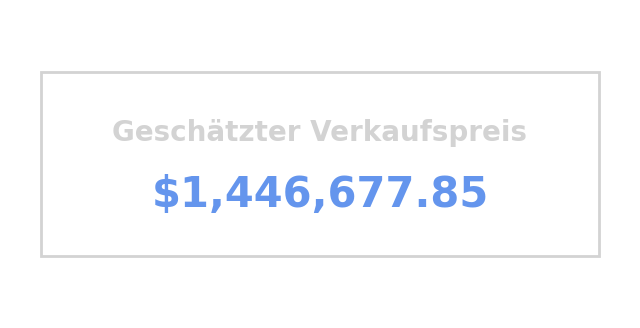

In [5]:
# Hier Werte eingeben, um den jeweiligen Verkaufspreis zu bestimmen
if __name__ == "__main__":
    # Hier spezifische Werte eintragen:
    predicted_price = calculate_price(
        stories=2,
        year_built=1999,
        nr_of_rms=7,
        fin_sqft=800,
        units=3,
        bdrms=3,
        fbath=2,
        hbath=1,
        lotsize=4000,
        year_sold=2027,
        month_sold=12
    )
    
    # Visualisierung des geschätzten Verkaufspreises
    visualize_prediction(predicted_price)
